Why is it generally preferable to use a logistic regression classifier rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?

A few reasons:
- The activation function does not provide probabilities
- The activation function means that it can flip from 0 to 100 when there is an error very close to 50%

Simply change the activation function to a sigmoid: 1 / (1 + exp(-z))

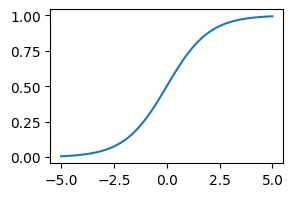

In [15]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(3,2))
ax.plot(x, sigmoid(x))
display()

Why was the sigmoid activation function a key ingredient in training the first MLPs?
> Because it is derivable everywhere, and backpropagation requires derivatives to calculate each step in the gradient descent

Name three popular activation functions. Can you draw them?

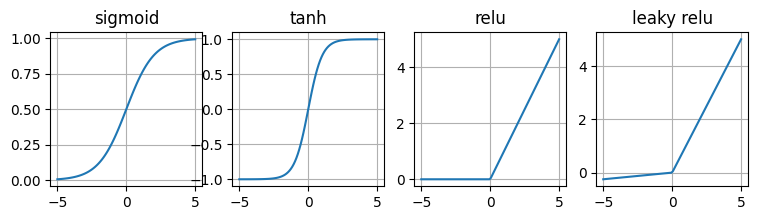

In [39]:
def tanh(z):
    return 2 * sigmoid(2 * z) - 1

def relu(z: np.ndarray):
    return np.maximum(0, z)

def leaky_relu(z: np.ndarray, alpha=0.05):
    return np.maximum(z * alpha, z)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(9, 2))
ax1.plot(x, sigmoid(x))
ax1.set_title('sigmoid')
ax2.plot(x, tanh(x))
ax2.set_title('tanh')
ax3.plot(x, relu(x))
ax3.set_title('relu')
ax4.plot(x, leaky_relu(x))
ax4.set_title('leaky relu')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
display()

ANN with:
- 10 inputs
- 50 hidden layer)
- 3 output

Shape of matrix X?
> (m, 10)

Shape of hidden layer weight matrix Wh and bias bh?
> Wh ~ (10, 50)
>   The multiplication from the previous step creates a matrix (m, 50).
> bh ~ (1, 50)
>   Broadcasted across m rows.
> Hence the output of relu(X @ Wh + bh) is (m, 50)

Shape of the output layer's weight matrix Wo and bias bo?
> Wo ~ (50, 3)
> bo ~ (1, 3) which is broadcasted across m rows.
> hence the output of multiplication from the previous step creates a matrix (m, 3) which is the shape of Y

Equation to calculate Y:
Y = relu(relu(X @ Wh + bh) @ Wo + bo) ~ (m, 3)

How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer?
> 1 neuron, sigmoid activation function

If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use?
> 10 neurons, softmax activation function

What about for getting your network to predict housing prices
> 1 neuron, no activation function

What is backpropagation and how does it work?
> In batches, computes:
> - a forward pass through the layers
> - measures loss and how much each connection and bias contributes to loss, repeating this step backwards for each layer
> - performs a step in gradient descent based on the gradient it computed

What is the difference between backpropagation and reverse-mode autodiff?
> reverse-mode autodiff is the forward pass and backward pass to compute the gradient.
> Backpropagation relies on these to compute the step it needs to take in gradient descent.

Can you list all the hyperparameters you can tweak in a basic MLP?
> Number of hidden layers
> Number of neurons in each layer
> Number of epochs
> The activation function used in each layer
> Optimization algorithm
> The learning rate of the optimization algorithm
> Batch size

If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?
> Use early stopping
> Use a tuner to randomly pick
> Decrease the learning rate
> Reduce the number of layers / neurons in each layer